In [1]:
#IMPORTs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import json
import requests
from IPython.display import Image
import os
from Functions import requestJSON

In [2]:
df1 = pd.read_csv("../OUTPUT/HDIrank2019_01_countryNameClean.csv")
df1 = df1.drop(columns="Unnamed: 0")
df1.head()

,HDIrank,Country,HDI,LifeExpectancy,ExpectedSchoolingYears,MeanSchoolingYears,GNIperCapita,LastYearRank,Category
0,1,Norway,0.954,82.3,18.1,12.6,68059,1,VERY HIGH HDI
1,2,Switzerland,0.946,83.6,16.2,13.4,59375,2,VERY HIGH HDI
2,3,Ireland,0.942,82.1,18.8,12.5,55660,3,VERY HIGH HDI
3,4,Germany,0.939,81.2,17.1,14.1,46946,4,VERY HIGH HDI
4,5,Hong Kong,0.939,84.7,16.5,12.0,60221,6,VERY HIGH HDI


In [3]:
countries = requestJSON('https://restcountries.eu/rest/v2/all')

Matching the list of missed country names using countryMatch function

In [4]:
#Next step: Create the columns

In [5]:
df2 = pd.DataFrame(countries)
df2.head()

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
0,Afghanistan,[.af],AF,AFG,[93],Kabul,"[AF, Afġānistān]",Asia,Southern Asia,27657145,...,[UTC+04:30],"[IRN, PAK, TKM, UZB, TJK, CHN]",افغانستان,004,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'de': 'Afghanistan', 'es': 'Afganistán', 'fr'...",https://restcountries.eu/data/afg.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",AFG
1,Åland Islands,[.ax],AX,ALA,[358],Mariehamn,"[AX, Aaland, Aland, Ahvenanmaa]",Europe,Northern Europe,28875,...,[UTC+02:00],[],Åland,248,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'sv', 'iso639_2': 'swe', 'name':...","{'de': 'Åland', 'es': 'Alandia', 'fr': 'Åland'...",https://restcountries.eu/data/ala.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",
2,Albania,[.al],AL,ALB,[355],Tirana,"[AL, Shqipëri, Shqipëria, Shqipnia]",Europe,Southern Europe,2886026,...,[UTC+01:00],"[MNE, GRC, MKD, KOS]",Shqipëria,008,"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...","{'de': 'Albanien', 'es': 'Albania', 'fr': 'Alb...",https://restcountries.eu/data/alb.svg,"[{'acronym': 'CEFTA', 'name': 'Central Europea...",ALB
3,Algeria,[.dz],DZ,DZA,[213],Algiers,"[DZ, Dzayer, Algérie]",Africa,Northern Africa,40400000,...,[UTC+01:00],"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",الجزائر,012,"[{'code': 'DZD', 'name': 'Algerian dinar', 'sy...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Algerien', 'es': 'Argelia', 'fr': 'Alg...",https://restcountries.eu/data/dza.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ALG
4,American Samoa,[.as],AS,ASM,[1684],Pago Pago,"[AS, Amerika Sāmoa, Amelika Sāmoa, Sāmoa Amelika]",Oceania,Polynesia,57100,...,[UTC-11:00],[],American Samoa,016,"[{'code': 'USD', 'name': 'United State Dollar'...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Amerikanisch-Samoa', 'es': 'Samoa Amer...",https://restcountries.eu/data/asm.svg,[],ASA


In [6]:
df2.columns

Index(['name', 'topLevelDomain', 'alpha2Code', 'alpha3Code', 'callingCodes',
       'capital', 'altSpellings', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders',
       'nativeName', 'numericCode', 'currencies', 'languages', 'translations',
       'flag', 'regionalBlocs', 'cioc'],
      dtype='object')

In [7]:
col=['topLevelDomain','callingCodes', 'altSpellings' ,'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders','nativeName', 'numericCode', 'currencies', 'languages', 'translations','regionalBlocs', 'cioc']
df2 = df2.drop(columns=col)
df2.head()

,name,alpha2Code,alpha3Code,capital,region,subregion,population,flag
0,Afghanistan,AF,AFG,Kabul,Asia,Southern Asia,27657145,https://restcountries.eu/data/afg.svg
1,Åland Islands,AX,ALA,Mariehamn,Europe,Northern Europe,28875,https://restcountries.eu/data/ala.svg
2,Albania,AL,ALB,Tirana,Europe,Southern Europe,2886026,https://restcountries.eu/data/alb.svg
3,Algeria,DZ,DZA,Algiers,Africa,Northern Africa,40400000,https://restcountries.eu/data/dza.svg
4,American Samoa,AS,ASM,Pago Pago,Oceania,Polynesia,57100,https://restcountries.eu/data/asm.svg


In [8]:
in_lst=[]
for name in df2.name:
    if name in list(df1.Country):
        in_lst.append(True)
    else:
        in_lst.append(False)
df2["In_lst"]=in_lst
df2.head()

,name,alpha2Code,alpha3Code,capital,region,subregion,population,flag,In_lst
0,Afghanistan,AF,AFG,Kabul,Asia,Southern Asia,27657145,https://restcountries.eu/data/afg.svg,True
1,Åland Islands,AX,ALA,Mariehamn,Europe,Northern Europe,28875,https://restcountries.eu/data/ala.svg,False
2,Albania,AL,ALB,Tirana,Europe,Southern Europe,2886026,https://restcountries.eu/data/alb.svg,True
3,Algeria,DZ,DZA,Algiers,Africa,Northern Africa,40400000,https://restcountries.eu/data/dza.svg,True
4,American Samoa,AS,ASM,Pago Pago,Oceania,Polynesia,57100,https://restcountries.eu/data/asm.svg,False


In [9]:
df2.In_lst.value_counts()

True     189
False     61
Name: In_lst, dtype: int64

In [10]:
df2 = df2[df2["In_lst"]==True]

In [11]:
df2.head()

,name,alpha2Code,alpha3Code,capital,region,subregion,population,flag,In_lst
0,Afghanistan,AF,AFG,Kabul,Asia,Southern Asia,27657145,https://restcountries.eu/data/afg.svg,True
2,Albania,AL,ALB,Tirana,Europe,Southern Europe,2886026,https://restcountries.eu/data/alb.svg,True
3,Algeria,DZ,DZA,Algiers,Africa,Northern Africa,40400000,https://restcountries.eu/data/dza.svg,True
5,Andorra,AD,AND,Andorra la Vella,Europe,Southern Europe,78014,https://restcountries.eu/data/and.svg,True
6,Angola,AO,AGO,Luanda,Africa,Middle Africa,25868000,https://restcountries.eu/data/ago.svg,True


In [12]:
df2.In_lst.value_counts()

True    189
Name: In_lst, dtype: int64

In [13]:
df2 = df2.sort_values("name").reset_index(drop=True)
df1 = df1.sort_values("Country").reset_index(drop=True)

In [14]:
df1.head()

,HDIrank,Country,HDI,LifeExpectancy,ExpectedSchoolingYears,MeanSchoolingYears,GNIperCapita,LastYearRank,Category
0,170,Afghanistan,0.496,64.5,10.1,3.9,1746,170,LOW HDI
1,69,Albania,0.791,78.5,15.2,10.1,12300,69,HIGH HDI
2,82,Algeria,0.759,76.7,14.7,8.0,13639,81,HIGH HDI
3,36,Andorra,0.857,81.8,13.3,10.2,48641,38,VERY HIGH HDI
4,149,Angola,0.574,60.8,11.8,5.1,5555,147,MEDIUM HDI


In [15]:
df = pd.concat([df1, df2], axis=1).reindex(df1.index)

In [16]:
df.head()

,HDIrank,Country,HDI,LifeExpectancy,ExpectedSchoolingYears,MeanSchoolingYears,GNIperCapita,LastYearRank,Category,name,alpha2Code,alpha3Code,capital,region,subregion,population,flag,In_lst
0,170,Afghanistan,0.496,64.5,10.1,3.9,1746,170,LOW HDI,Afghanistan,AF,AFG,Kabul,Asia,Southern Asia,27657145,https://restcountries.eu/data/afg.svg,True
1,69,Albania,0.791,78.5,15.2,10.1,12300,69,HIGH HDI,Albania,AL,ALB,Tirana,Europe,Southern Europe,2886026,https://restcountries.eu/data/alb.svg,True
2,82,Algeria,0.759,76.7,14.7,8.0,13639,81,HIGH HDI,Algeria,DZ,DZA,Algiers,Africa,Northern Africa,40400000,https://restcountries.eu/data/dza.svg,True
3,36,Andorra,0.857,81.8,13.3,10.2,48641,38,VERY HIGH HDI,Andorra,AD,AND,Andorra la Vella,Europe,Southern Europe,78014,https://restcountries.eu/data/and.svg,True
4,149,Angola,0.574,60.8,11.8,5.1,5555,147,MEDIUM HDI,Angola,AO,AGO,Luanda,Africa,Middle Africa,25868000,https://restcountries.eu/data/ago.svg,True


In [17]:
df['Country'].equals(df['name'])

True

In [18]:
df = df.drop(columns=["name","In_lst"])

In [19]:
df.region.value_counts()

Africa      53
Asia        47
Europe      42
Americas    35
Oceania     12
Name: region, dtype: int64

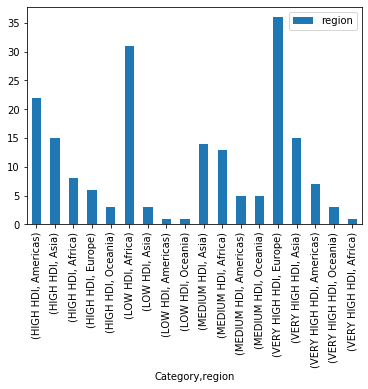

In [20]:
df.groupby(['Category']).agg({'region':'value_counts'
                                
                              }).plot.bar()

In [21]:
df = df.sort_values("HDIrank").reset_index(drop=True)

In [22]:
df

,HDIrank,Country,HDI,LifeExpectancy,ExpectedSchoolingYears,MeanSchoolingYears,GNIperCapita,LastYearRank,Category,alpha2Code,alpha3Code,capital,region,subregion,population,flag
0,1,Norway,0.954,82.3,18.1,12.6,68059,1,VERY HIGH HDI,NO,NOR,Oslo,Europe,Northern Europe,5223256,https://restcountries.eu/data/nor.svg
1,2,Switzerland,0.946,83.6,16.2,13.4,59375,2,VERY HIGH HDI,CH,CHE,Bern,Europe,Western Europe,8341600,https://restcountries.eu/data/che.svg
2,3,Ireland,0.942,82.1,18.8,12.5,55660,3,VERY HIGH HDI,IE,IRL,Dublin,Europe,Northern Europe,6378000,https://restcountries.eu/data/irl.svg
3,4,Germany,0.939,81.2,17.1,14.1,46946,4,VERY HIGH HDI,DE,DEU,Berlin,Europe,Western Europe,81770900,https://restcountries.eu/data/deu.svg
4,5,Hong Kong,0.939,84.7,16.5,12.0,60221,6,VERY HIGH HDI,HK,HKG,City of Victoria,Asia,Eastern Asia,7324300,https://restcountries.eu/data/hkg.svg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,Burundi,0.423,61.2,11.3,3.1,660,185,LOW HDI,BI,BDI,Bujumbura,Africa,Eastern Africa,10114505,https://restcountries.eu/data/bdi.svg
185,186,South Sudan,0.413,57.6,5.0,4.8,1455,186,LOW HDI,SS,SSD,Juba,Africa,Middle Africa,12131000,https://restcountries.eu/data/ssd.svg
186,187,Chad,0.401,54.0,7.5,2.4,1716,187,LOW HDI,TD,TCD,N'Djamena,Africa,Middle Africa,14497000,https://restcountries.eu/data/tcd.svg
187,188,Central African Republic,0.381,52.8,7.6,4.3,777,188,LOW HDI,CF,CAF,Bangui,Africa,Middle Africa,4998000,https://restcountries.eu/data/caf.svg


In [23]:
df.to_csv("../OUTPUT/HDIrank2019_02_mergedDataframes.csv")

In [24]:
no_top = list(range(10,179))
lst=[]
for i in range(189):
    if i in no_top:
        lst.append(False)
    else:
        lst.append(True)

len(lst)
df['inlst'] = lst

In [25]:
top = df[df['inlst']==True]

In [26]:
top = top.reset_index(drop=True)
top = top.drop(columns="inlst")

In [27]:
top.to_csv("../OUTPUT/HDIrank2019_03_TopUpandDown.csv")

In [28]:
top_mean = top.groupby(['Category']).mean().drop(columns = ["HDIrank","LastYearRank"]).T.round(2)

In [45]:
top_mean

Category,LOW HDI,VERY HIGH HDI
HDI,0.42,0.94
LifeExpectancy,58.81,82.84
ExpectedSchoolingYears,7.93,18.11
MeanSchoolingYears,3.16,12.59
GNIperCapita,1343.30,56368.40
population,13847624.30,16593940.40


In [30]:
df = df.drop(columns="inlst")

In [31]:
region = df.groupby("region").mean().drop(columns = ["HDIrank","LastYearRank"]).sort_values(["HDI"]).round(2)

In [32]:
region

,HDI,LifeExpectancy,ExpectedSchoolingYears,MeanSchoolingYears,GNIperCapita,population
region,,,,,,
Africa,0.55,63.91,10.64,5.49,5358.58,22132844.34
Oceania,0.70,72.30,13.75,9.49,11456.00,3272716.25
Asia,0.73,74.14,13.05,8.67,20077.06,92272794.36
Americas,0.75,75.21,13.75,9.13,15378.23,28144805.86
Europe,0.87,79.31,16.11,11.80,35043.69,17726672.26


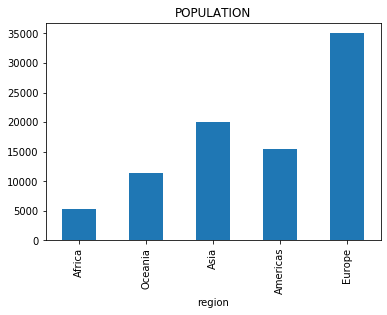

In [47]:
region.GNIperCapita.plot.bar(title="POPULATION")

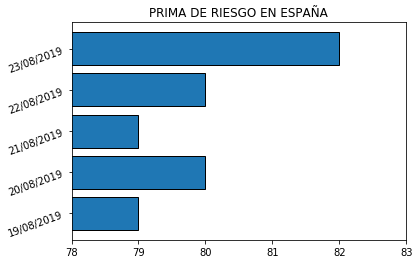

In [34]:
fechas = ['19/08/2019', '20/08/2019', '21/08/2019', '22/08/2019', '23/08/2019']
primas = [79, 80, 79, 80, 82]

plt.barh(range(5), primas, edgecolor='black')

plt.yticks(range(5), fechas, rotation=20)
plt.title("PRIMA DE RIESGO EN ESPAÑA")
plt.xlim(min(primas)-1, max(primas)+1)
plt.show()

In [35]:
index = df.loc[:, ['Category','region']]

In [36]:
index

,Category,region
0,VERY HIGH HDI,Europe
1,VERY HIGH HDI,Europe
2,VERY HIGH HDI,Europe
3,VERY HIGH HDI,Europe
4,VERY HIGH HDI,Asia
...,...,...
184,LOW HDI,Africa
185,LOW HDI,Africa
186,LOW HDI,Africa
187,LOW HDI,Africa


In [37]:
index.Category.value_counts()

VERY HIGH HDI    62
HIGH HDI         54
MEDIUM HDI       37
LOW HDI          36
Name: Category, dtype: int64

In [39]:
index_cat = pd.get_dummies(index["Category"])
index_cat

,HIGH HDI,LOW HDI,MEDIUM HDI,VERY HIGH HDI
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
184,0,1,0,0
185,0,1,0,0
186,0,1,0,0
187,0,1,0,0


In [40]:
count = pd.concat([index, index_cat], axis=1).reindex(index.index)

In [41]:
count = count.loc[:, ['region','VERY HIGH HDI','HIGH HDI','MEDIUM HDI','LOW HDI']]
countdf = count.groupby("region").sum()

In [44]:
countdf

,VERY HIGH HDI,HIGH HDI,MEDIUM HDI,LOW HDI
region,,,,
Africa,1,8,13,31
Americas,7,22,5,1
Asia,15,15,14,3
Europe,36,6,0,0
Oceania,3,3,5,1
